## N차 과제 - Time Series Analysis_주가예측

- 주제: 시계열 모델을 주가 데이터에 대한 시계열 예측 및 분석
- 데이터: 주식 데이터(크롤링 or 라이브러리로 데이터 불러오기)
- 사용 라이브러리: yfinance, datareader, statsmodels, matplotlib etc.

In [3]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from matplotlib import dates
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose


In [2]:
import yfinance as yf

data = yf.download('TQQQ', start = '2019-10-04', end = '2024-08-04')
print(data)

[*********************100%***********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2019-10-04  14.927500  15.420000  14.897500  15.355000  14.855965   84488800
2019-10-07  15.215000  15.582500  15.135000  15.212500  14.718095   81265200
2019-10-08  14.910000  15.120000  14.500000  14.520000  14.048103  117702800
2019-10-09  14.900000  15.152500  14.765000  14.960000  14.473804   76134800
2019-10-10  14.962500  15.467500  14.920000  15.287500  14.790658   88119600
...               ...        ...        ...        ...        ...        ...
2024-07-29  66.269997  67.190002  64.519997  65.459999  65.249870   57820400
2024-07-30  66.279999  66.589996  61.340000  62.790001  62.588440   71531800
2024-07-31  66.980003  69.000000  66.379997  68.279999  68.060814   86704200
2024-08-01  68.580002  70.220001  61.700001  63.360001  63.156612  105346600
2024-08-02  59.650002  60.720001  57.000000  58.740002  58.551441  104922000

### 1. EDA 및 전처리

1.1 분석을 위해 사용할 특정 주식(1개)의 데이터를 불러오거나 크롤링하여 가져오세요(**최소 3년 이상의 데이터 추출 권고**).

In [4]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-10-04,14.927500,15.420000,14.897500,15.355000,14.855965,84488800
2019-10-07,15.215000,15.582500,15.135000,15.212500,14.718095,81265200
2019-10-08,14.910000,15.120000,14.500000,14.520000,14.048103,117702800
2019-10-09,14.900000,15.152500,14.765000,14.960000,14.473804,76134800
2019-10-10,14.962500,15.467500,14.920000,15.287500,14.790658,88119600
...,...,...,...,...,...,...
2024-07-29,66.269997,67.190002,64.519997,65.459999,65.249870,57820400
2024-07-30,66.279999,66.589996,61.340000,62.790001,62.588440,71531800
2024-07-31,66.980003,69.000000,66.379997,68.279999,68.060814,86704200


1.2 결측치가 있는지 확인하고 있다면 제거해주세요.

In [5]:
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

1.3 일자를 인덱스로 설정하고 시간 순서대로 정렬하세요.

In [6]:
data.sort_index(inplace = True)

data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-10-04,14.927500,15.420000,14.897500,15.355000,14.855965,84488800
2019-10-07,15.215000,15.582500,15.135000,15.212500,14.718095,81265200
2019-10-08,14.910000,15.120000,14.500000,14.520000,14.048103,117702800
2019-10-09,14.900000,15.152500,14.765000,14.960000,14.473804,76134800
2019-10-10,14.962500,15.467500,14.920000,15.287500,14.790658,88119600
...,...,...,...,...,...,...
2024-07-29,66.269997,67.190002,64.519997,65.459999,65.249870,57820400
2024-07-30,66.279999,66.589996,61.340000,62.790001,62.588440,71531800
2024-07-31,66.980003,69.000000,66.379997,68.279999,68.060814,86704200


In [8]:
# 데이터 저장
data.to_csv('TQQQ_data.csv')

In [9]:
# 데이터 불러오기
data = pd.read_csv('TQQQ_data.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data.sort_index(inplace = True)

data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-10-04,14.927500,15.420000,14.897500,15.355000,14.855965,84488800
2019-10-07,15.215000,15.582500,15.135000,15.212500,14.718095,81265200
2019-10-08,14.910000,15.120000,14.500000,14.520000,14.048103,117702800
2019-10-09,14.900000,15.152500,14.765000,14.960000,14.473804,76134800
2019-10-10,14.962500,15.467500,14.920000,15.287500,14.790658,88119600
...,...,...,...,...,...,...
2024-07-29,66.269997,67.190002,64.519997,65.459999,65.249870,57820400
2024-07-30,66.279999,66.589996,61.340000,62.790001,62.588440,71531800
2024-07-31,66.980003,69.000000,66.379997,68.279999,68.060814,86704200


1.4 수정종가(adj close)와 거래량(volume)을 시각화하세요.

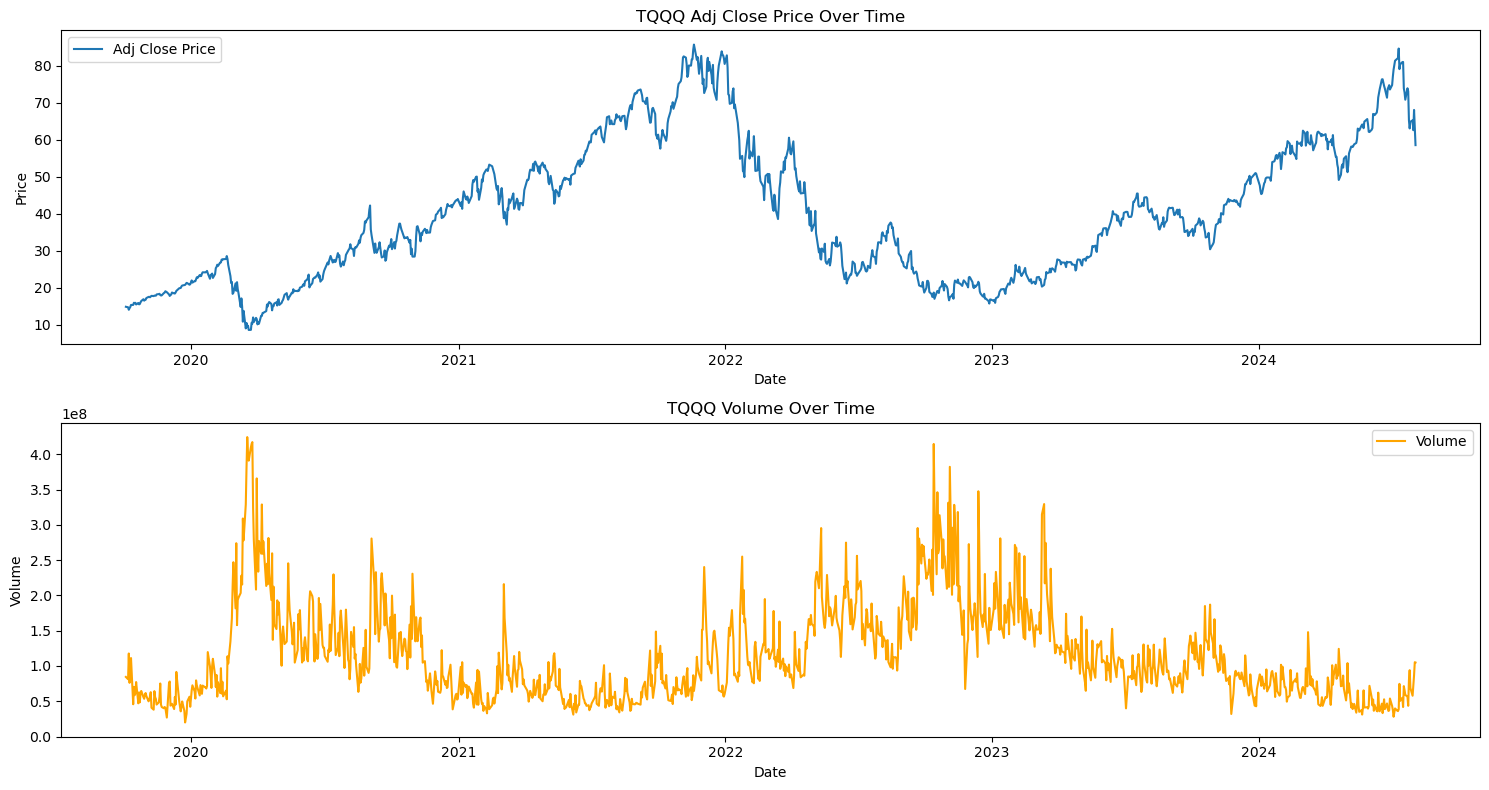

In [10]:
plt.figure(figsize=(15,8))
plt.subplot(2, 1, 1)
plt.plot(data.index, data['Adj Close'], label ='Adj Close Price')
plt.title('TQQQ Adj Close Price Over Time')
plt.ylabel('Price')
plt.xlabel('Date')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(data.index, data['Volume'], label ='Volume', color="orange")
plt.title('TQQQ Volume Over Time')
plt.ylabel('Volume')
plt.xlabel('Date')
plt.legend()

ax = plt.gca()
ax.xaxis.set_major_locator(dates.YearLocator())
plt.tight_layout()
plt.show()

1.5 위 시각화 과정을 통해 알 수 있는 내용에 대해 작성하세요.

- Adj Close price를 통해서 주가가 20년 코로나 기간 급격한 하락 이후 2022년 미국 연준의 금리 인상이 시작되기 전까지 쭉 우상향 하는 모습을 보여준다. 이후 지속적으로 금리가 올라가는 2023년까지 하락하다가 금리가 안정되고 다시 이전의 주가를 회복하였고 이후 2024년 금리인하의 조짐이 보이자 급격하게 요동치는 모습을 보여준다.

- Volume의 경우 코로나로 급격한 하락이 발생했을때 가장 많은 거래량을 보여주었고 이후 2022년 말에 높은 거래량을 보여주었다 최근 경기 침체 우려 및 지속적인 높은 금리가 유지되는 상황에 맞게 2023년 중순부터 현재까지 낮은 거래량을 보여준다.

### 2. 추세 및 정상성 검정

2.1 시계열 데이터의 정상성을 검증하도록 하겠습니다. 시계열 데이터 말하는 정상성(stationarity)이 무엇인지 왜 해야 하며 비정상성의 해결 방법에는 무엇이 있는지 작성하세요.

- 시계열 데이터에서 말하는 정상성이란 데이터의 평균 분산 공분산이 시간에 따라 변하지 않는 것을 의미하고 정상성 검증을 해야하는 이유로는 ARIMA, SARIMA등 시계열 예측 모델이 정상성을 가정하기 때문에 정상성이 보장되지 않으면 예측 성능이 떨어지고 불안정한 예측을 초래하기 때문이다.
- 비정상성 해결 방법에는 차분을 이용하여 평균을 일정하게 만드는 방법 로그 변환을 통해 분산을 안정화하는 방법 이동평균을 사용하는 방법등이 존재한다.

2.2 먼저 ADF Test를 수행하겠습니다. statsmodels의 adfuller 라이브러리를 import 한 후 수정 종가에 대한 검정을 수행하고 결과를 출력하세요(p-value 포함).

ADF Test란? - https://hongl.tistory.com/98

In [11]:
result = adfuller(data['Adj Close'])

print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -1.8809319326110496
p-value: 0.3410838090478471
Critical Values: {'1%': -3.4357974716016093, '5%': -2.8639455255208186, '10%': -2.5680507439699447}


2.3 ADF Test 결과를 해석하세요.

- p-value가 0.5047로 0.05보다 훨씬 큽니다. 이는 시계열이 비정상적임을 나타낸다.
- ADF 통계값 -1.5577은 모든 임계값보다 크므로, 정상성을 가정할 수 없다.

2.4 ACF 그래프와 PACF 그래프를 그려보도록 하겠습니다. 먼저 ACF와 PACF 각각이 어떻게 다른지 설명하세요.

- ACF는 현재 값이 얼마나 과거의 값들에 영향을 받는지 전체적인 상관성을 보여주고 PACF는 현재 값이 특정 과거 값과 직접적으로 얼마나 연관이 있는지를 보여준다.

2.5 statsmodels의 plot_acf, plot_pacf 라이브러리를 import하고 Adj close값에 대한 ACF, PACF 그래프를 출력하세요.

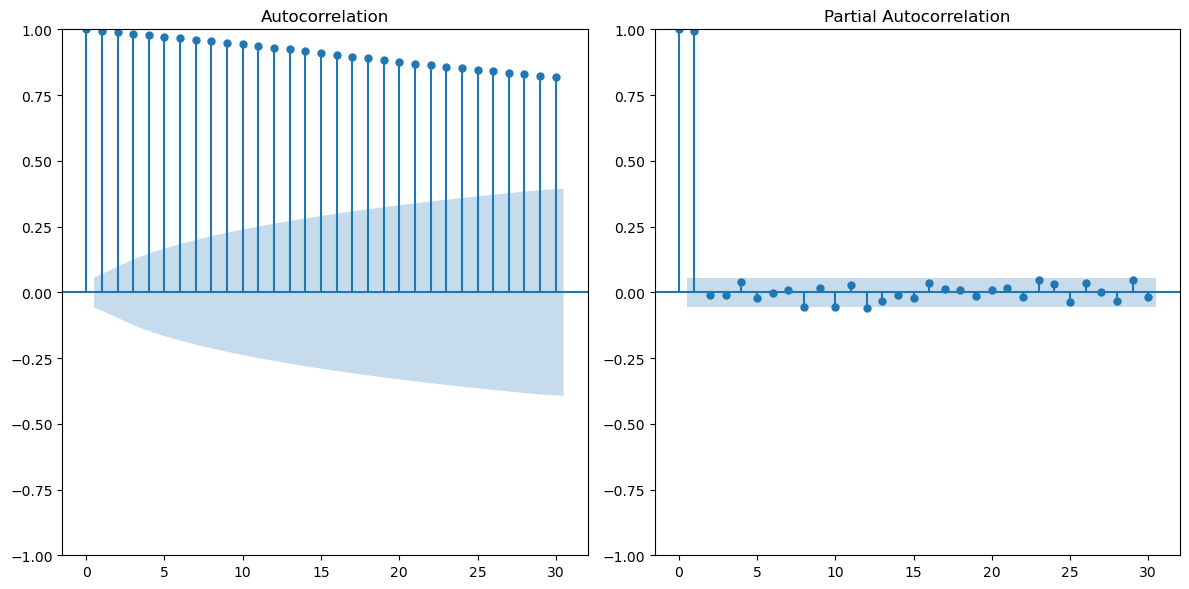

In [12]:
plt.figure(figsize=(12, 6))

# ACF Plot
plt.subplot(1, 2, 1)
plot_acf(data['Adj Close'], lags=30, ax=plt.gca()) 

# PACF Plot
plt.subplot(1, 2, 2)
plot_pacf(data['Adj Close'], lags=30, ax=plt.gca())

plt.tight_layout()
plt.show()

2.6 결과를 해석하세요.

- ACF 점점 작아지는 모습을 보여준다. 전체적으로 자기상관성이 있음을 보여준다. 비정상
- PACF p1이후에 범위 안들어 들어가는 모습을 보여줌

2.7 마지막으로 계절성이 있는지 여부를 확인하겠습니다. statsmodels의 seasonal_decompose 라이브러리를 import하고 plot을 출력하세요.

<Figure size 2000x1000 with 0 Axes>

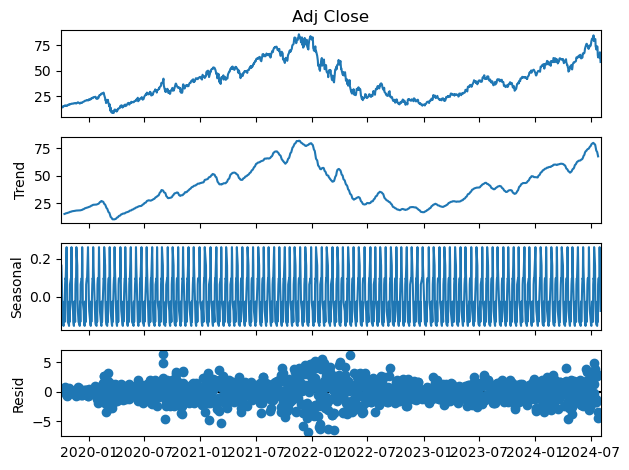

In [13]:
result = seasonal_decompose(data['Adj Close'], model='additive', period=12) 

plt.figure(figsize=(20, 10))
result.plot()
plt.tight_layout()
plt.show()

2.8 위 결과를 해석하세요.

- Trend 전체적으로 상승과 하락을 반복한다.
- seasonal 계절성에서는 계절보다 더 짧은 범위에서 일정한 패턴을 보여준다.
- 2021년말 2022년초에 잔차가 커지는 경향을 보이고 현재시점 잔차가 커지는 모습을 보여준다 주가가 상승함에 따라서 변동이 커진다.

2.9 위에서 진행한 검정 과정 및 시각화 결과를 종합해봤을 때 현 데이터는 비정상성임을 알 수 있습니다. 따라서 차분을 통해 이를 해결하도록 하겠습니다. 먼저 차분이 어떤 것인지에 대해 설명하세요.

차분(Differencing)은 시계열 데이터의 비정상성을 해결하기 위해 사용하는 기법으로, 주어진 시계열 데이터에서 이전 시점의 값을 현재 시점의 값에서 빼는 과정이다. 이를 통해 데이터의 트렌드와 계절성을 제거하여 정상성을 확보할 수 있다.

2.10 1차 차분을 진행하도록 하겠습니다. diff() 함수를 활용해 1차 차분을 진행한 후 ADF Test를 수행하여 정상성 여부를 확인하세요.

In [14]:
data['First_Diff'] = data['Adj Close'].diff()

adf_result = adfuller(data['First_Diff'].dropna())

adf_statistic = adf_result[0]
p_value = adf_result[1]

print('ADF Statistic:', adf_statistic)
print('p-value:', p_value)

ADF Statistic: -9.448533932323638
p-value: 4.683907458594926e-16


2.11 추가로 위에서 그려보았던 plot들을 다시 그려보면서 비교를 통해 정상성 여부를 확인해보도록 하겠습니다. ACF PACF plot, 계절성 분해 plot을 그려보세요.

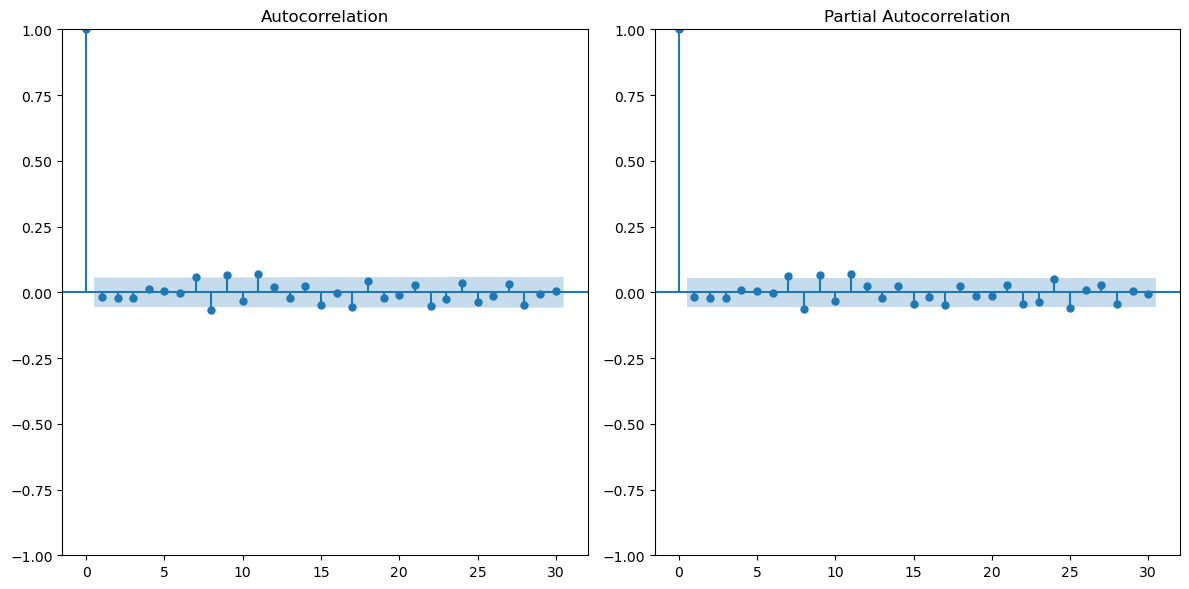

In [15]:
plt.figure(figsize=(12, 6))

# ACF Plot
plt.subplot(1, 2, 1)
plot_acf(data['First_Diff'].dropna(), lags=30, ax=plt.gca()) 

# PACF Plot
plt.subplot(1, 2, 2)
plot_pacf(data['First_Diff'].dropna(), lags=30, ax=plt.gca())

plt.tight_layout()
plt.show()

<Figure size 2000x1000 with 0 Axes>

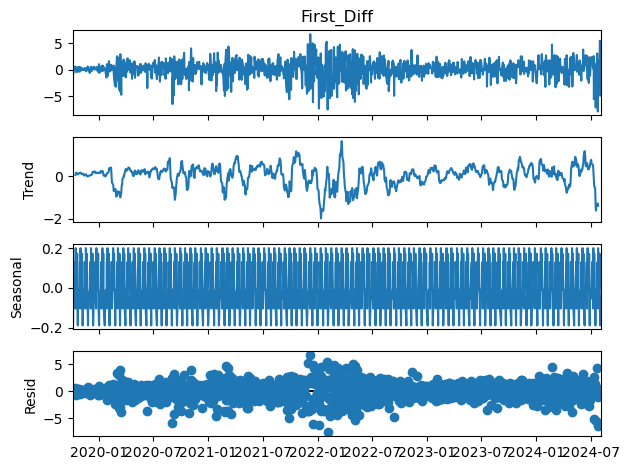

In [16]:
result = seasonal_decompose(data['First_Diff'].dropna(), model='additive', period=12)

plt.figure(figsize=(20, 10))
result.plot()
plt.tight_layout()
plt.show()

### 3. 예측

3.1 데이터의 정상성을 확인했으니 본격적으로 예측 및 분석을 진행해보도록 하겠습니다.

아래 코드는 예시이므로 예시에서 사용된 모델이 아닌 다른 모델(ex. ARIMAX, ARCH/GARCH, LSTM, Transformer, DLinear etc.)를 사용하고 애플이 아닌 다른 주식을 사용해 예측 및 분석을 진행해주세요(**위에서 진행한 과정 역시 모두 예시이므로 새로운 주식에 대한 전처리 및 정상성 검정을 새로 진행해야 함**).

In [17]:
from statsmodels.tsa.arima.model import ARIMA

In [18]:
data['First_Diff']

Date
2019-10-04         NaN
2019-10-07   -0.137870
2019-10-08   -0.669991
2019-10-09    0.425700
2019-10-10    0.316854
                ...   
2024-07-29    0.378777
2024-07-30   -2.661430
2024-07-31    5.472374
2024-08-01   -4.904202
2024-08-02   -4.605171
Name: First_Diff, Length: 1215, dtype: float64

In [19]:
model = ARIMA(data['First_Diff'], order=(3, 0, 0))  #위에서 차분을 미리 했으므로 차분 값은 0으로 설정
model_fit = model.fit()


model_fit.summary()

/home/dhai/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/dhai/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/dhai/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             First_Diff   No. Observations:                 1215
Model:                 ARIMA(3, 0, 0)   Log Likelihood               -2379.175
Date:                Sun, 06 Oct 2024   AIC                           4768.350
Time:                        15:06:47   BIC                           4793.862
Sample:                             0   HQIC                          4777.954
                               - 1215                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0363      0.050      0.725      0.469      -0.062       0.134
ar.L1         -0.0186      0.024     -0.789      0.430      -0.065       0.028
ar.L2         -0.0209      0.022     -0.964      0.335      -0.063       0.022
ar.L3         -0.0218      0.022     -0.982      0.326      -0.065       0.022
sigma2         2.9496      0.089     32.983      0.000       2.774       3.125
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               323.95
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.09   Skew:                            -0.66
Prob(H) (two-sided):                  0.41   Kurtosis:                         5.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/home/dhai/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/dhai/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


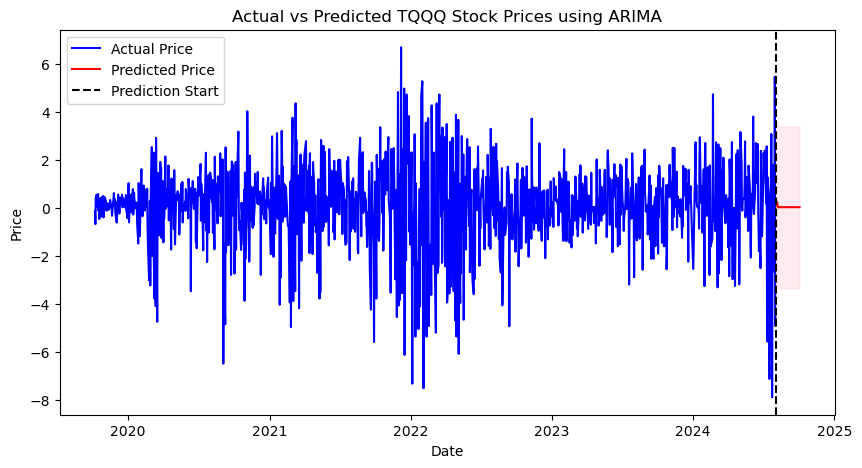

In [24]:
#예측 수행(50일, 200일해도 달라지지 않았음 ㅠ)
forecast_result = model_fit.get_forecast(steps=44)
forecast = forecast_result.predicted_mean
conf_int = forecast_result.conf_int()

#예측 결과 시각화
plt.figure(figsize=(10, 5))
plt.plot(data.index, data['First_Diff'], label='Actual Price', color='blue')
plt.plot(pd.date_range(start=data.index[-1], periods=45, freq='B')[1:], forecast, label='Predicted Price', color='red')
plt.fill_between(pd.date_range(start=data.index[-1], periods=45, freq='B')[1:], conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.axvline(x=data.index[-1], color='black', linestyle='--', label='Prediction Start')
plt.title('Actual vs Predicted TQQQ Stock Prices using ARIMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [23]:
#실제 데이터 가져오기
actual_data_last_50 = yf.download('TQQQ', start='2024-08-04', end='2024-10-06')
actual_last_50 = actual_data_last_50[['Close']]
actual_last_50.info()

[*********************100%***********************]  1 of 1 completed

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 44 entries, 2024-08-05 to 2024-10-04
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   44 non-null     float64
dtypes: float64(1)
memory usage: 704.0 bytes


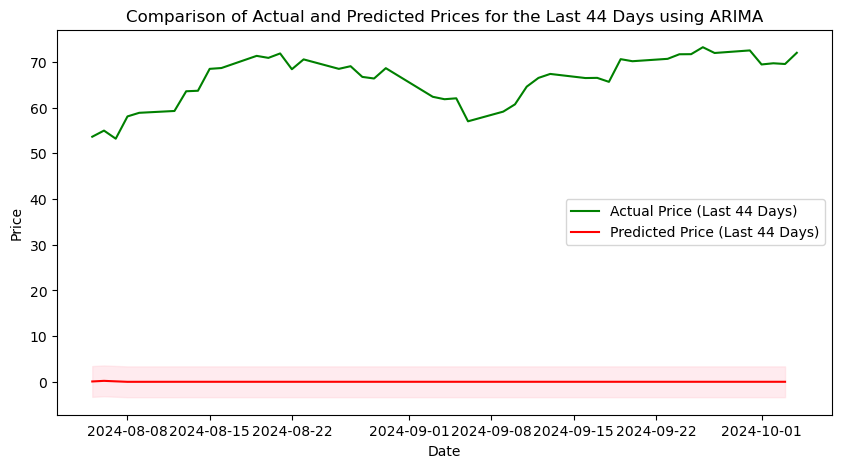

In [29]:
#실제 데이터와 비교 시각화
plt.figure(figsize=(10, 5))
plt.plot(actual_last_50.index, actual_last_50['Close'], label='Actual Price (Last 44 Days)', color='green')
plt.plot(pd.date_range(start=data.index[-1], periods=45, freq='B')[1:], forecast, label='Predicted Price (Last 44 Days)', color='red')
plt.fill_between(pd.date_range(start=data.index[-1], periods=45, freq='B')[1:], conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Comparison of Actual and Predicted Prices for the Last 44 Days using ARIMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

ARIMA에서는 성능이 왠지는 모르겠으나 잘 안 나와서 이정도만 하고 넘어가겠습니다. 밑에서 진행할 Prophet 모형의 경우 예측이 제대로 진행되어 추세를 예측하고자 단기적 예측이라 할 수 있는 50일이 아닌 향후 200일을 예측하였습니다.

### Prophet

Prophet 모델이란?
https://wikidocs.net/233162

In [32]:
from prophet import Prophet

In [41]:
###Prophet의 경우 ARIMA와 검정 및 전처리 과정이 약간 달라 새로 진행하였으며 보다 정확한 추세 예측을 위해 200일까지 예측하였습니다.###


ticker = 'TQQQ'
data = yf.download(ticker, start = '2019-10-04', end = '2024-04-04')

df = data.reset_index()[['Date', 'Close']]
df.columns = ['ds', 'y']  #Prophet에서는 날짜 컬럼을 'ds', 값 컬럼을 'y'로 설정해야 함

[*********************100%***********************]  1 of 1 completed


In [42]:
#모델 설정(파라미터는 따로 설정하지 않고 진행했으나 보다 정확한 예측을 위해 수정하는 것도 좋음)
model = Prophet()
model.fit(df)

15:23:31 - cmdstanpy - INFO - Chain [1] start processing
15:23:31 - cmdstanpy - INFO - Chain [1] done processing


In [43]:
#200일간의 예측 진행
future = model.make_future_dataframe(periods=200)
forecast = model.predict(future)

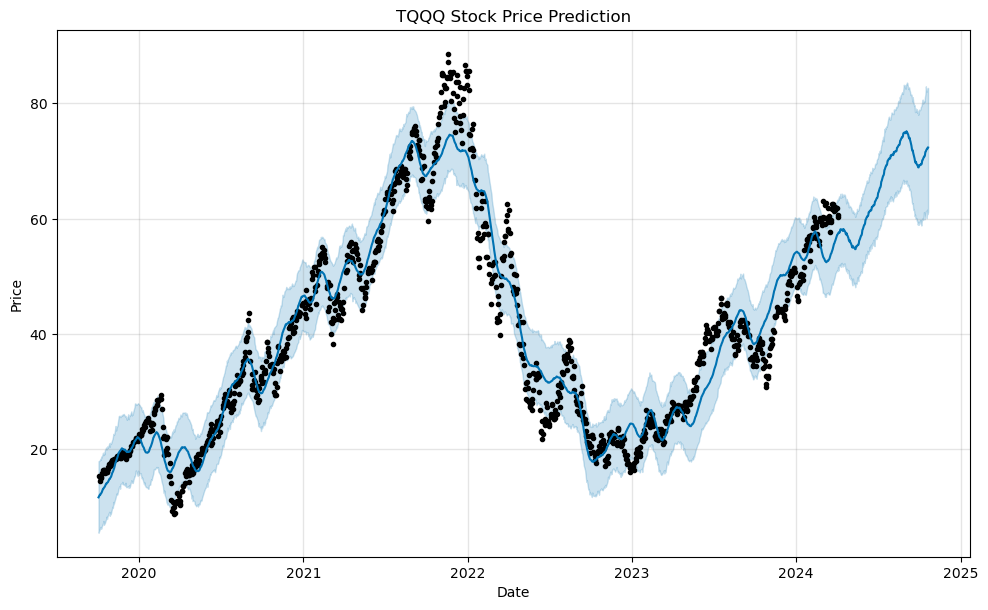

In [44]:
# 예측 결과 시각화
fig1 = model.plot(forecast)
plt.title('TQQQ Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

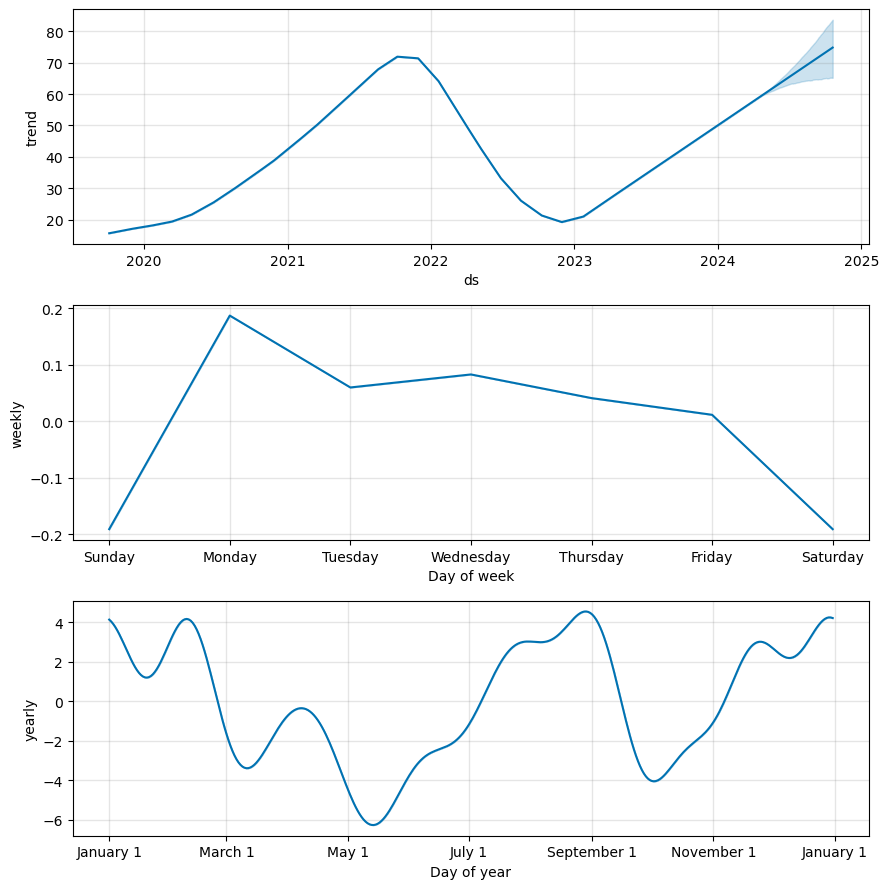

In [45]:
#트렌드 및 주기성 시각화
fig2 = model.plot_components(forecast)
plt.show()

In [46]:
#마지막 44일의 실제 주가 데이터 가져오기
actual_data_last_50 = yf.download(ticker, start='2024-04-04', end='2024-10-06')
actual_last_50 = actual_data_last_50.reset_index()[['Date', 'Close']]
actual_last_50.columns = ['ds', 'y']

[*********************100%***********************]  1 of 1 completed


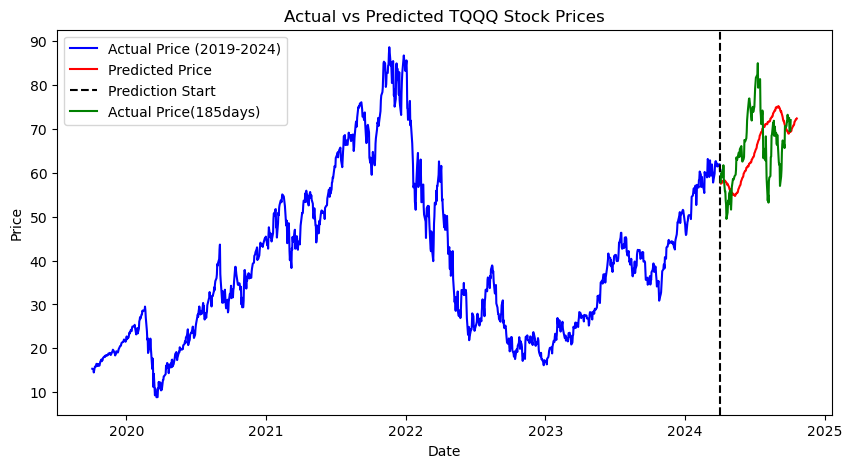

In [48]:
#실제 값과 비교 시각화
plt.figure(figsize=(10, 5))
plt.plot(df['ds'], df['y'], label='Actual Price (2019-2024)', color='blue')

plt.plot(forecast['ds'][len(df):], forecast['yhat'][len(df):], label='Predicted Price', color='red') ##전체 예측값 중 200일 이후 것만 사용
plt.axvline(x=df['ds'].iloc[-1], color='black', linestyle='--', label='Prediction Start')
plt.plot(actual_last_50['ds'], actual_last_50['y'], label='Actual Price(185days)', color='green')
plt.title('Actual vs Predicted TQQQ Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


예시에서는 전통적 시계열 모형인 ARIMA 보다 최신 기법인 Prophet이 보다 좋은 성능을 보였습니다. 

사실 ARIMA로도 좋은 예측을 진행할 수는 있으나 조금 간단하게 진행하였으며(죄송합니다..시간관계상 ㅠ) SARIMA, ARIMAX와 같이 발전된 모형을 사용하는 것도 방법입니다. 

예시보다 좋은 예측을 진행하여 주시길 바라며 단순히 시각화하는 것을 넘어서 ***RMSE***나 ***MAE***와 같은 성능지표를 활용해 정량적 평가를 진행해주시면 좋을 것 같습니다.

## LSTM

In [227]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,LSTM
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import math
from sklearn.metrics import mean_squared_error
from kerastuner.engine.hyperparameters import HyperParameters
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

In [228]:
data = yf.download('TQQQ', start='2019-10-04', end='2024-10-06')
data = data[['Adj Close']]

[*********************100%***********************]  1 of 1 completed


In [229]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [230]:
def create_dataset(dataset, time_step=1):
    x_data, y_data = [], []
    
    for i in range(len(dataset)-time_step-1):
        x_data.append(dataset[i:(i+time_step), 0])
        y_data.append(dataset[i + time_step, 0])
    return np.array(x_data), np.array(y_data)

In [231]:
train_data = scaled_data[:-200] 
X_train, y_train = create_dataset(train_data, time_step=100) 
test_data = scaled_data[-200:]
X_test, y_test = create_dataset(test_data, time_step=100)

In [233]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
time_step = 100

In [234]:
def build_model(hp):
    model = Sequential()
    model.add(layers.LSTM(units = hp.Choice('layer1_units', [10,20,30,40,50,60,70,80,90,100]),return_sequences=True,input_shape=(time_step,1)))
    
    for i in range(hp.Int('num_layers', 2, 15)):                        
        model.add(layers.LSTM(units =  hp.Int('units' + str(i), min_value=10, max_value=150, step=10), return_sequences=True))
    
    model.add(LSTM(units = hp.Choice('last_lstm_units', [50, 100, 150])))
    model.add(Dropout(rate = hp.Choice('rate', [0.3, 0.4, 0.5, 0.6, 0.7])))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error',optimizer='adam' )
    return model


tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials= 5,
    executions_per_trial=3,
    directory='project', project_name = 'Stacked_LSTM_Stock_Prediction')

tuner.search_space_summary()

tuner.search(X_train, y_train,
             epochs= 5,
             validation_data=(X_test, ytest))

Reloading Tuner from project/Stacked_LSTM_Stock_Prediction/tuner0.json
Search space summary
Default search space size: 19
layer1_units (Choice)
{'default': 10, 'conditions': [], 'values': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'ordered': True}
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 15, 'step': 1, 'sampling': 'linear'}
units0 (Int)
{'default': None, 'conditions': [], 'min_value': 10, 'max_value': 150, 'step': 10, 'sampling': 'linear'}
units1 (Int)
{'default': None, 'conditions': [], 'min_value': 10, 'max_value': 150, 'step': 10, 'sampling': 'linear'}
last_lstm_units (Choice)
{'default': 50, 'conditions': [], 'values': [50, 100, 150], 'ordered': True}
rate (Choice)
{'default': 0.3, 'conditions': [], 'values': [0.3, 0.4, 0.5, 0.6, 0.7], 'ordered': True}
units2 (Int)
{'default': None, 'conditions': [], 'min_value': 10, 'max_value': 150, 'step': 10, 'sampling': 'linear'}
units3 (Int)
{'default': None, 'conditions': [], 'min_value': 10, 'max_val

In [235]:
tuner.results_summary()

Results summary
Results in project/Stacked_LSTM_Stock_Prediction
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 2 summary
Hyperparameters:
layer1_units: 50
num_layers: 3
units0: 150
units1: 20
last_lstm_units: 100
rate: 0.7
units2: 90
units3: 120
units4: 110
units5: 110
units6: 10
Score: 0.0033703461134185395

Trial 0 summary
Hyperparameters:
layer1_units: 10
num_layers: 6
units0: 80
units1: 130
last_lstm_units: 100
rate: 0.6
units2: 10
units3: 10
units4: 10
units5: 10
Score: 0.00425931322388351

Trial 1 summary
Hyperparameters:
layer1_units: 100
num_layers: 7
units0: 150
units1: 30
last_lstm_units: 50
rate: 0.7
units2: 90
units3: 30
units4: 100
units5: 140
units6: 10
Score: 0.004784428824981053

Trial 4 summary
Hyperparameters:
layer1_units: 50
num_layers: 15
units0: 60
units1: 40
last_lstm_units: 150
rate: 0.5
units2: 10
units3: 120
units4: 100
units5: 40
units6: 80
units7: 130
units8: 100
units9: 70
units10: 80
units11: 100
units12: 50
units13: 100
units14

In [236]:
model=tuner.get_best_models(num_models=1)[0]
model.summary()
# tuner를 통해 찾은 최적의 모델

/home/dhai/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/home/dhai/anaconda3/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 36 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 150)       │       120,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 20)        │        13,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 100, 90)        │        39,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 100)            │        76,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 261,141 (1020.08 KB)

 Trainable params: 261,141 (1020.08 KB)

 Non-trainable params: 0 (0.00 B)

In [237]:
model.compile(optimizer='adam', loss='mean_squared_error')

# 모델 훈련
model_history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=32)

Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0264 - val_loss: 0.0095
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0123 - val_loss: 0.0027
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0131 - val_loss: 0.0030
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0112 - val_loss: 0.0021
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0107 - val_loss: 0.0024
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0146 - val_loss: 0.0021
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0094 - val_loss: 0.0024
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0084 - val_loss: 0.0023
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0095 - val_loss: 0.0015
Epoch 10/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0099 - val_loss: 0.0016
Epoch 11/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0080 - val_loss: 0.0013
Epoch 12/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step

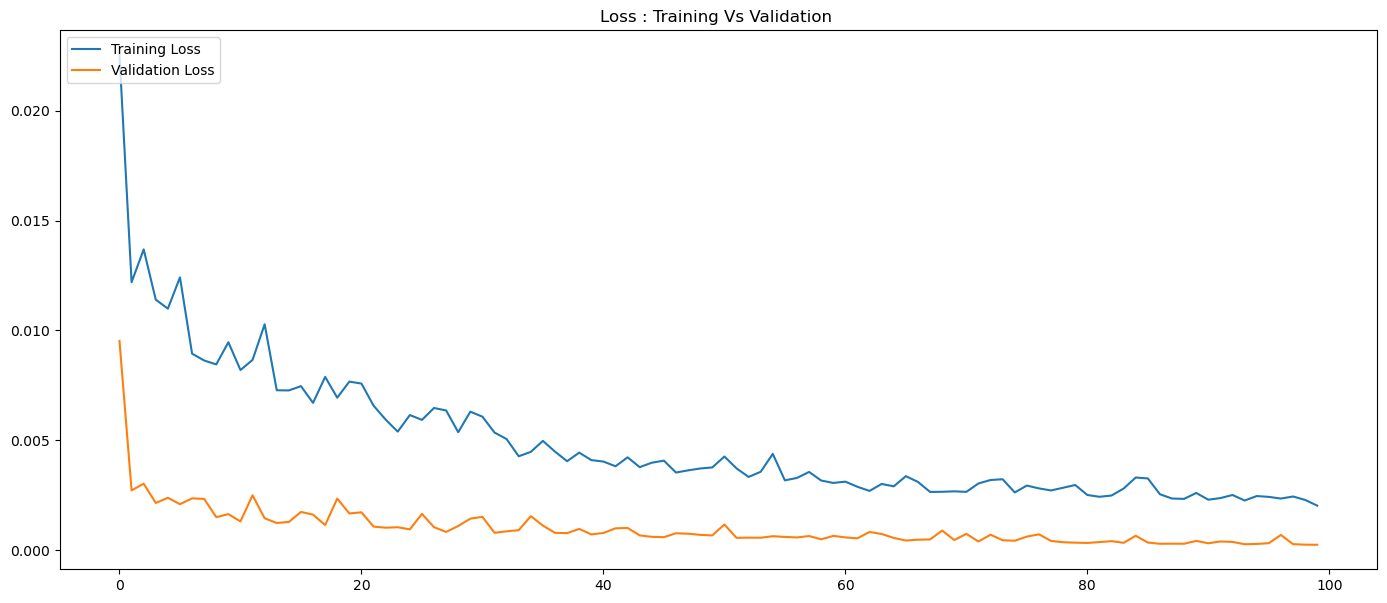

In [238]:
loss = model_history.history['loss']
validation_loss = model_history.history['val_loss']

plt.figure(figsize=(17, 7));
plt.plot(range(100), loss, label='Training Loss');
plt.plot(range(100), validation_loss, label='Validation Loss');
plt.legend(loc='upper left');
plt.title('Loss : Training Vs Validation ');

In [239]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [240]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

Actual Prices Shape: (1259, 1)
Test Predict Shape: (99, 1)


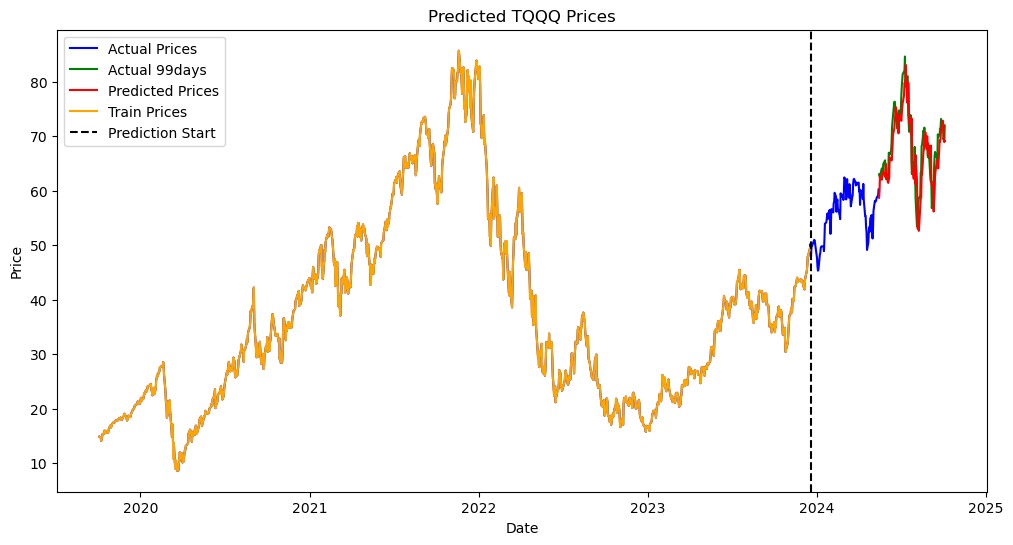

In [282]:
# test_predict와 actual_prices 길이 확인
print("Actual Prices Shape:", actual_prices.shape)
print("Test Predict Shape:", test_predict.shape)

# 실제 가격과 예측 가격 시각화
plt.figure(figsize=(12, 6))
plt.plot(data.index[:-99], data[:-99], label='Actual Prices', color='blue')  # 최근 200일의 실제 가격만 표시
plt.plot(data.index[-99:], data[-99:], label='Actual 99days', color='green')
# 예측값 시각화
if len(test_predict.flatten()) == 99:  # 예상 길이에 맞추어 확인
    plt.plot(data.index[-99:], test_predict.flatten(), label='Predicted Prices', color='red')  # 차원 변경
else:
    print(f"Warning: Test predictions length {len(test_predict.flatten())} does not match expected length.")
plt.plot(data.index[:-200], scaler.inverse_transform(scaled_data[:-200]), label='Train Prices', color='orange')  # 훈련 데이터

plt.axvline(x=data.index[-200], color='black', linestyle='--', label='Prediction Start')

plt.title('Predicted TQQQ Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

